In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics


### Data collection

In [2]:
df = pd.read_csv("Dataset_medical_insurance/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Analysis and cleaning

In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Checking for null values
df.isnull().sum()  # There are none nullvalues here

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Checking for duplicates
print (df.shape)
df_drop_dup = df.drop_duplicates()
print (df_drop_dup.shape)

(1338, 7)
(1337, 7)


In [ ]:
# There was one duplicate row. This got removed.

In [12]:
### Show the distribution of each features

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 600x600 with 0 Axes>

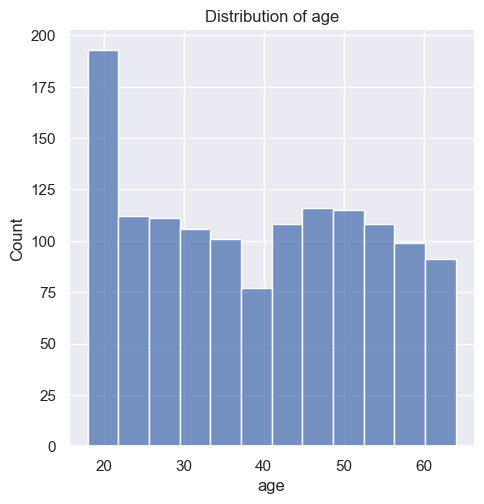

In [8]:
# Age distribution
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df_drop_dup.age)
plt.title("Distribution of age")
plt.show

In [ ]:
# The distribution of age is almost equal. Most number of values are between 18-22 (most number of people in this dataset are between 18-22). 
#The rest are almost equal distributed  

<function matplotlib.pyplot.show(close=None, block=None)>

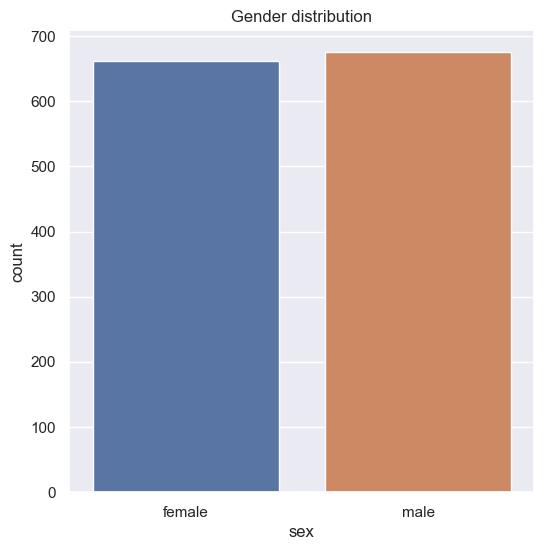

In [9]:
# Gender distribution
plt.figure(figsize=(6,6))
sns.countplot(x= 'sex', data = df_drop_dup) # Countplot for categorical features 
plt.title("Gender distribution")
plt.show

In [14]:
df_drop_dup.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

In [15]:
## the gender are equal distributed

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 600x600 with 0 Axes>

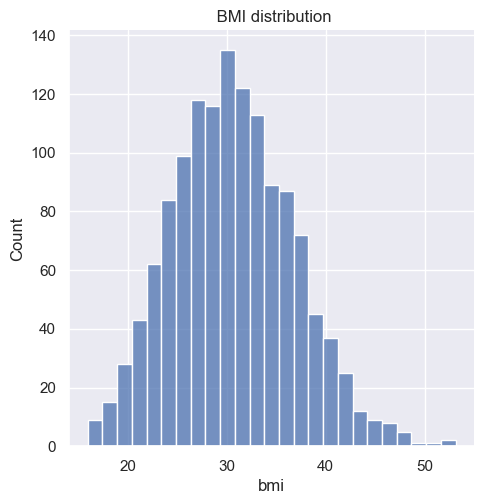

In [16]:
# Gender distribution
plt.figure(figsize=(6,6))
sns.displot(df_drop_dup.bmi)
plt.title(" BMI distribution")
plt.show

In [17]:
## BMI is normal distributed. the most values are in the middle (30)
## The normal BMI range is between 18.5 and 24.9. Values lower or greater than this range indicates resp. an underweight or overweight.
## Since most of the people in this dataset have a BMI around 30, this means, people in this dataset are majority overweight

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 600x600 with 0 Axes>

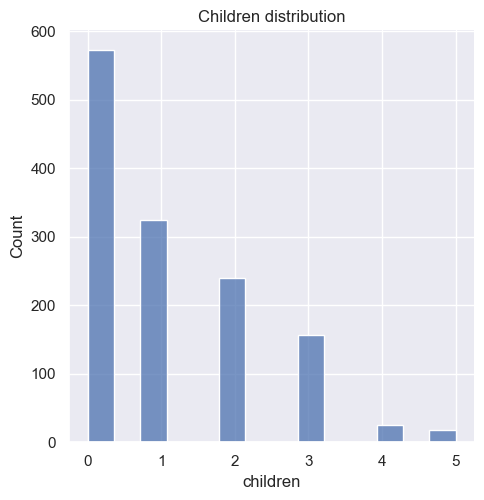

In [18]:
# children distribution
plt.figure(figsize=(6,6))
sns.displot(df_drop_dup.children)
plt.title("Children distribution")
plt.show

In [13]:
df_drop_dup.children.value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
## most of people does not have Children (0)

<function matplotlib.pyplot.show(close=None, block=None)>

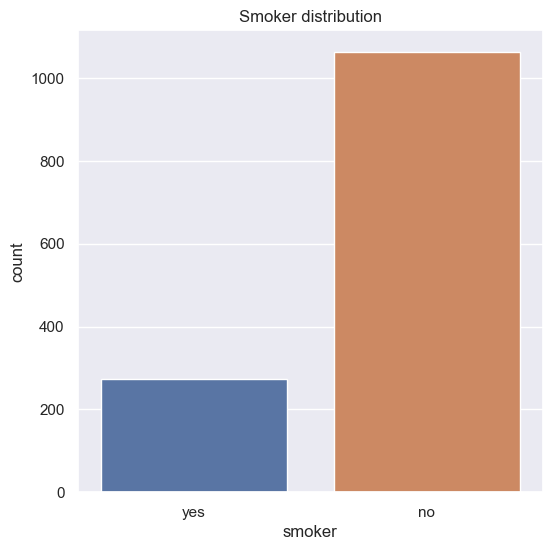

In [19]:
# Smoker distribution
plt.figure(figsize=(6,6))
sns.countplot(x= 'smoker', data = df_drop_dup) # Countplot for categorical features 
plt.title("Smoker distribution")
plt.show

In [20]:
df_drop_dup.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [ ]:
## Most of the people in this dataset are non smoker 

<function matplotlib.pyplot.show(close=None, block=None)>

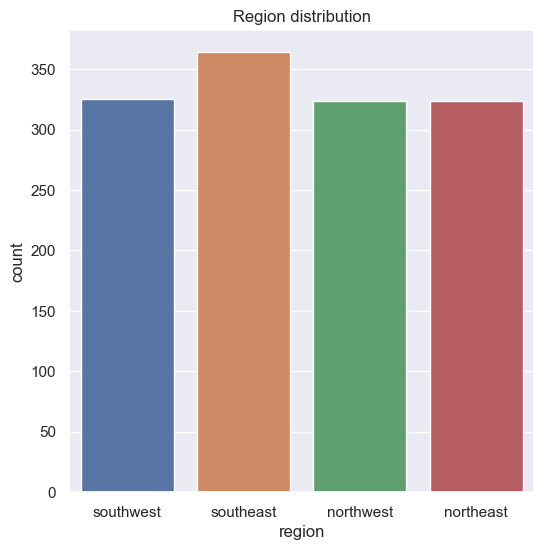

In [21]:
# Region distribution
plt.figure(figsize=(6,6))
sns.countplot(x= 'region', data = df_drop_dup) # Countplot for categorical features 
plt.title("Region distribution")
plt.show

In [22]:
df_drop_dup.region.value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [27]:
## Regions are almost equally distributed

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 600x600 with 0 Axes>

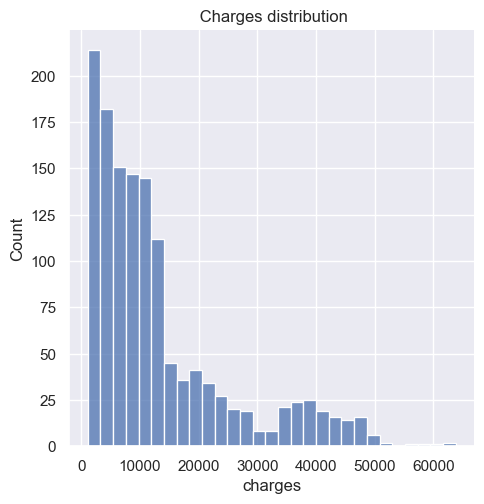

In [23]:
# Charges distribution
plt.figure(figsize=(6,6))
sns.displot(df_drop_dup.charges)
plt.title(" Charges distribution")
plt.show

In [34]:
## Most of people have insurance charges around 10.000 dollars

In [28]:
# Resetting the index of the final cleaned data
df_cleaned = df_drop_dup.reset_index(drop=True)
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [29]:
# Save cleaned table
df_cleaned.to_csv("cleaned_table.csv")

### Split the dataset into train and test set

In [30]:
x = df_cleaned.iloc[:,:-1] ## or x = df.drop("charges", axis=1)
y = df_cleaned.iloc[:,-1] ## or y = df["charges"]

In [32]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [43]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
print (x.shape, x_train.shape, x_test.shape)

(1337, 6) (1069, 6) (268, 6)


In [36]:
# Creating an OneHotEncoder object to contain the categorical features
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(x[['sex' , 'smoker', 'region']])

OneHotEncoder()

In [38]:
# Create a column transformer to trasform categorical columns
from sklearn.compose import make_column_transformer

column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_), ['sex' , 'smoker', 'region']), remainder='passthrough')

### Model training

In [39]:
lr = LinearRegression()
svr = SVR()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

In [40]:
# Making a pipeline for each model
from sklearn.pipeline import make_pipeline

lr_pipe = make_pipeline(column_trans, lr)
svr_pipe = make_pipeline(column_trans, svr)
rfr_pipe = make_pipeline(column_trans, rfr)
gbr_pipe = make_pipeline(column_trans, gbr)

In [45]:
# Fitting the linear Regression model
lr_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['female', 'male'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linearregression', LinearRegression())])

In [47]:
# Fitting the Support vector regressor model
svr_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['female', 'male'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('svr', SVR())])

In [49]:
# Fitting the Random forest regressor model
rfr_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['female', 'male'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [52]:
# Fitting the Gradient boosting regressor model
gbr_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['female', 'male'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

### Models predictions

In [90]:
# LR Predict on test data
y_pred_lr = lr_pipe.predict(x_test)

# SVR Predict on test data
y_pred_svr = svr_pipe.predict(x_test)

# RFR Predict on test data
y_pred_rfr = rfr_pipe.predict(x_test)

# RFR Predict on test data
y_pred_gbr = gbr_pipe.predict(x_test)

In [91]:
# Compare the model predictions with actual values

df_pred_compare = pd.DataFrame({"Actual": y_test, "LR": y_pred_lr, "SVR": y_pred_svr, "Random Forest Regressor":y_pred_rfr, "Gradient Boosting Regressor": y_pred_gbr})
df_pred_compare

,Actual,LR,SVR,Random Forest Regressor,Gradient Boosting Regressor
899,8688.85885,8143.693884,9286.059108,9238.602401,10571.650620
1063,5708.86700,5737.115683,9178.981906,6769.535991,7016.725897
1255,11436.73815,14369.314876,9302.150266,12294.191571,13396.659345
298,38746.35510,31745.513636,9191.008932,42987.418956,38934.127303
237,4463.20510,8962.386657,9193.054520,7927.463136,6796.933987
...,...,...,...,...,...
534,13831.11520,16753.406458,9356.652114,14281.686942,13917.986333
542,13887.20400,15274.565769,9355.184849,14634.148531,15149.999321
759,3925.75820,6454.699355,9154.509412,8428.034634,7388.634490
1283,47403.88000,38467.156720,9348.443125,47898.709147,49901.577458


### Models evaluations

In [94]:
# Evaluate (with r2) and compare the performance of each model

score_lr = metrics.r2_score(y_test, y_pred_lr)
score_svr = metrics.r2_score(y_test, y_pred_svr)
score_rfr = metrics.r2_score(y_test, y_pred_rfr)
score_gbr = metrics.r2_score(y_test, y_pred_gbr)

In [95]:
print(f" LR: {round(score_lr*100, 2)}% \nSVR: {round(score_svr*100, 2)}%  \nRFR: {round(score_rfr*100, 2)}% \nGBR: {round(score_gbr*100, 2)}% ")

 LR: 80.69% 
SVR: -13.45%  
RFR: 88.63% 
GBR: 90.04% 


In [96]:
# --> GBR Model is performing better with score = 90.04%

In [97]:
# Evaluate with mean absolute error
score_lr_mae = metrics.mean_absolute_error(y_test, y_pred_lr)
score_svr_mae = metrics.mean_absolute_error(y_test, y_pred_svr)
score_rfr_mae = metrics.mean_absolute_error(y_test, y_pred_rfr)
score_gbr_mae = metrics.mean_absolute_error(y_test, y_pred_gbr)
print(f" LR: {score_lr_mae} \nSVR: {score_svr_mae}  \nRFR: {score_rfr_mae} \nGBR: {score_gbr_mae}")

 LR: 4177.045561036324 
SVR: 9255.290672737716  
RFR: 2570.3705704611934 
GBR: 2540.151447730098


In [89]:
# GBR has the lowest GBR --> best model

### Test: Predict charges for a new custumer

In [99]:
data = {"age": 29, "sex": "female", "bmi": 22.3, "children": 0, "smoker": "no", "region": "southeast"}

df_test_new = pd.DataFrame(data, index = [0])
df_test_new

,age,sex,bmi,children,smoker,region
0,29,female,22.3,0,no,southeast


In [102]:
new_predict = gbr_pipe.predict(df_test_new)
print(f" predicted charge: {new_predict}")

 predicted charge: [4388.91708892]


### Save model

In [103]:
# Before saving the model train the model on the entire dataset to achieve a better accuracy
gbr_pipe.fit(x, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['female', 'male'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [106]:
# Now save the model as a picke file
import joblib

joblib.dump(gbr_pipe, 'saved_model/gbr_model.pkl')

['saved_model/gbr_model.pkl']